In [61]:
%run main.py
%run EDAmain.py

In [62]:
df = pd.read_csv("D:\SERKAN KIZILIRMAK\Python\AllProjects\Müşteri Kayıp Analizi (TelcoCustomer)\Data\TelcoCustomer(TR).csv")

# Descriptive Analysis

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cinsiyet                      7043 non-null   object 
 1   65 Yaş Üstü                   7043 non-null   int64  
 2   Medeni Durum                  7043 non-null   object 
 3   Bakma Sorumluluğu             7043 non-null   object 
 4   Müşteri Olma Süresi(Ay)       7043 non-null   int64  
 5   Ev Telefonu Aboneliği         7043 non-null   object 
 6   Birden Fazla Abonelik Durumu  7043 non-null   object 
 7   İnternet Aboneliği            7043 non-null   object 
 8   Güvenlik Hizmeti Aboneliği    7043 non-null   object 
 9   Yedekleme Hizmeti Aboneliği   7043 non-null   object 
 10  Ekipman Güvenlik Aboneliği    7043 non-null   object 
 11  Teknik Destek Aboneliği       7043 non-null   object 
 12  IP Tv Aboneliği               7043 non-null   object 
 13  Fil

In [64]:
printmd("**Data Types**<br>")
print(df.dtypes.value_counts())
printmd(f"Veri Setinin Boyutu: **{df.shape[0]}** satır,  **{df.shape[1]}** sutün")

**Data Types**<br>

object     16
int64       2
float64     2
dtype: int64


Veri Setinin Boyutu: **7043** satır,  **20** sutün

In [65]:
printmd("**Özelliklere Göre Eşsiz Değerler**")
for feature in df.columns:
    uniq = np.unique(df[feature])
    print(feature.ljust(left_padding),len(uniq))

**Özelliklere Göre Eşsiz Değerler**

Cinsiyet              2
65 Yaş Üstü           2
Medeni Durum          2
Bakma Sorumluluğu     2
Müşteri Olma Süresi(Ay) 73
Ev Telefonu Aboneliği 2
Birden Fazla Abonelik Durumu 3
İnternet Aboneliği    3
Güvenlik Hizmeti Aboneliği 3
Yedekleme Hizmeti Aboneliği 3
Ekipman Güvenlik Aboneliği 3
Teknik Destek Aboneliği 3
IP Tv Aboneliği       3
Film Abonelği         3
Sözleşme Süresi       3
Online Fatura(Kağıtsız) 2
Ödeme Şekli           4
Aylık Ücret           1585
Toplam Ücret          6531
Kayıp Durumu          2


# Kayıp Veriler (Missing Values)

In [66]:
print(df.isna().sum())
printmd("**isna sadece nümerik veriler için kullanıldığı için kategorik verilere bakmamız gerekiyor**")

Cinsiyet                         0
65 Yaş Üstü                      0
Medeni Durum                     0
Bakma Sorumluluğu                0
Müşteri Olma Süresi(Ay)          0
Ev Telefonu Aboneliği            0
Birden Fazla Abonelik Durumu     0
İnternet Aboneliği               0
Güvenlik Hizmeti Aboneliği       0
Yedekleme Hizmeti Aboneliği      0
Ekipman Güvenlik Aboneliği       0
Teknik Destek Aboneliği          0
IP Tv Aboneliği                  0
Film Abonelği                    0
Sözleşme Süresi                  0
Online Fatura(Kağıtsız)          0
Ödeme Şekli                      0
Aylık Ücret                      0
Toplam Ücret                    11
Kayıp Durumu                     0
dtype: int64


**isna sadece nümerik veriler için kullanıldığı için kategorik verilere bakmamız gerekiyor**

In [67]:
cat_cols = set(df.columns) - set(df._get_numeric_data().columns)
printmd("Object veriler için de Kayıp Değerlere bakarsak")
for cat in cat_cols:
    print(cat.ljust(left_padding), df[cat].apply(lambda x:len(x.strip()) == 0 or x.strip().lower() == 'nan').sum())
printmd("Toplam Ücret Dışında 'nan' veri gözükmüyor")

Object veriler için de Kayıp Değerlere bakarsak

Medeni Durum          0
Kayıp Durumu          0
Online Fatura(Kağıtsız) 0
Birden Fazla Abonelik Durumu 0
Sözleşme Süresi       0
İnternet Aboneliği    0
Teknik Destek Aboneliği 0
Bakma Sorumluluğu     0
Ev Telefonu Aboneliği 0
Ekipman Güvenlik Aboneliği 0
Cinsiyet              0
Film Abonelği         0
IP Tv Aboneliği       0
Güvenlik Hizmeti Aboneliği 0
Yedekleme Hizmeti Aboneliği 0
Ödeme Şekli           0


Toplam Ücret Dışında 'nan' veri gözükmüyor

# Imputation

In [68]:
indices_null_tc = df[df["Toplam Ücret"].isna()].index

In [69]:
display(df.iloc[indices_null_tc])
printmd("Toplam Ücret 0 yani 'na' olanların aynı zamanda Müşteri Olma Süresi 0 olduğunu görüyoruz")
printmd("Kısacası, Toplam Ücretin de 0 ile değiştirmekte sorun yoktur")

,Cinsiyet,65 Yaş Üstü,Medeni Durum,Bakma Sorumluluğu,Müşteri Olma Süresi(Ay),Ev Telefonu Aboneliği,Birden Fazla Abonelik Durumu,İnternet Aboneliği,Güvenlik Hizmeti Aboneliği,Yedekleme Hizmeti Aboneliği,Ekipman Güvenlik Aboneliği,Teknik Destek Aboneliği,IP Tv Aboneliği,Film Abonelği,Sözleşme Süresi,Online Fatura(Kağıtsız),Ödeme Şekli,Aylık Ücret,Toplam Ücret,Kayıp Durumu
488,Kadın,0,Evli,Var,0,Yok,Telefon Hizmeti Yok,DSL,Var,Yok,Var,Var,Var,Yok,2 Yıllık,Evet,Havale,52.55,NaN,Yok
753,Erkek,0,Bekar,Var,0,Var,Yok,Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,2 Yıllık,Hayır,Mail,20.25,NaN,Yok
936,Kadın,0,Evli,Var,0,Var,Yok,DSL,Var,Var,Var,Yok,Var,Var,2 Yıllık,Hayır,Mail,80.85,NaN,Yok
1082,Erkek,0,Evli,Var,0,Var,Var,Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,2 Yıllık,Hayır,Mail,25.75,NaN,Yok
1340,Kadın,0,Evli,Var,0,Yok,Telefon Hizmeti Yok,DSL,Var,Var,Var,Var,Var,Yok,2 Yıllık,Hayır,Kredi Kartı,56.05,NaN,Yok
3331,Erkek,0,Evli,Var,0,Var,Yok,Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,2 Yıllık,Hayır,Mail,19.85,NaN,Yok
3826,Erkek,0,Evli,Var,0,Var,Var,Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,2 Yıllık,Hayır,Mail,25.35,NaN,Yok
4380,Kadın,0,Evli,Var,0,Var,Yok,Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,2 Yıllık,Hayır,Mail,20.00,NaN,Yok
5218,Erkek,0,Evli,Var,0,Var,Yok,Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,Internet Hizmeti Yok,1 Yıllık,Evet,Mail,19.70,NaN,Yok
6670,Kadın,0,Evli,Var,0,Var,Var,DSL,Yok,Var,Var,Var,Var,Yok,2 Yıllık,Hayır,Mail,73.35,NaN,Yok


Toplam Ücret 0 yani 'na' olanların aynı zamanda Müşteri Olma Süresi 0 olduğunu görüyoruz

Kısacası, Toplam Ücretin de 0 ile değiştirmekte sorun yoktur

In [70]:
printmd("Yukarıdaki gözlemden ayrıca şu sonucu çıkarabiliriz, 'Toplam Ücret' = 'Aylık Ücret' x 'Müşteri Olma Süres' + Ekstra Maliyetler")

Yukarıdaki gözlemden ayrıca şu sonucu çıkarabiliriz, 'Toplam Ücret' = 'Aylık Ücret' x 'Müşteri Olma Süres' + Ekstra Maliyetler

In [71]:
display(df["Toplam Ücret"][df["Müşteri Olma Süresi(Ay)"] == 0].head(5))
display(df["Toplam Ücret"][df["Müşteri Olma Süresi(Ay)"] == 1].head(5))
display(df["Toplam Ücret"][df["Müşteri Olma Süresi(Ay)"] == 2].head(5))
printmd("Müşteri Olma Süresi 0 aydan yüksek olanlarda böyle bir sorun gözükmemektedir")

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
Name: Toplam Ücret, dtype: float64

0     29.85
20    39.65
22    20.15
27    30.20
33    20.20
Name: Toplam Ücret, dtype: float64

2     108.15
4     151.65
31    181.65
46     97.00
47    144.15
Name: Toplam Ücret, dtype: float64

Müşteri Olma Süresi 0 aydan yüksek olanlarda böyle bir sorun gözükmemektedir

In [72]:
df['Toplam Ücret'].fillna(0, inplace=True)
display(df["Toplam Ücret"][df["Müşteri Olma Süresi(Ay)"] == 0].head(5))

488     0.0
753     0.0
936     0.0
1082    0.0
1340    0.0
Name: Toplam Ücret, dtype: float64

# Binning

In [73]:
df[['Müşteri Olma Süresi(Ay)', 'Aylık Ücret', 'Toplam Ücret']].describe().T

,count,mean,std,min,25%,50%,75%,max
Müşteri Olma Süresi(Ay),7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
Aylık Ücret,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
Toplam Ücret,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [74]:
def binning_feature(feature):
    plt.hist(df[feature])

    # set x/y labels and plot title
    plt.xlabel(f"{feature.title()}")
    plt.ylabel("Count")
    plt.title(f"{feature.title()} Bins")
    plt.show()

    bins = np.linspace(min(df[feature]), max(df[feature]), 4)

    printmd("**Value Range**")

    printmd(f"Low ({bins[0] : .2f} - {bins[1]: .2f})")
    printmd(f"Medium ({bins[1]: .2f} - {bins[2]: .2f})")
    printmd(f"High ({bins[2]: .2f} - {bins[3]: .2f})")

    group_names = ['Low', 'Medium', 'High']

    df.insert(df.shape[1]-1, f'{feature}-binned', pd.cut(df[feature], bins, labels=group_names, include_lowest=True))
    display(df[[feature, f'{feature}-binned']].head(10))

    # count values
    printmd("<br>**Binning Distribution**<br>")
    display(df[f'{feature}-binned'].value_counts())

    # plot the distribution of each bin
    plt.bar(group_names, df[f'{feature}-binned'].value_counts())
    # px.bar(data_canada, x='year', y='pop')

    # set x/y labels and plot title
    plt.xlabel(f"{feature.title()}")
    plt.ylabel("Count")
    plt.title(f"{feature.title()} Bins")
    plt.show()

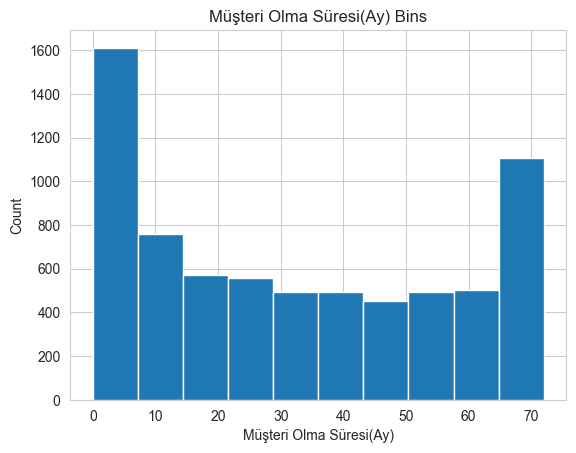

**Value Range**

Low ( 0.00 -  24.00)

Medium ( 24.00 -  48.00)

High ( 48.00 -  72.00)

,Müşteri Olma Süresi(Ay),Müşteri Olma Süresi(Ay)-binned
0,1,Low
1,34,Medium
2,2,Low
3,45,Medium
4,2,Low
5,8,Low
6,22,Low
7,10,Low
8,28,Medium
9,62,High


<br>**Binning Distribution**<br>

Low       3210
High      2239
Medium    1594
Name: Müşteri Olma Süresi(Ay)-binned, dtype: int64

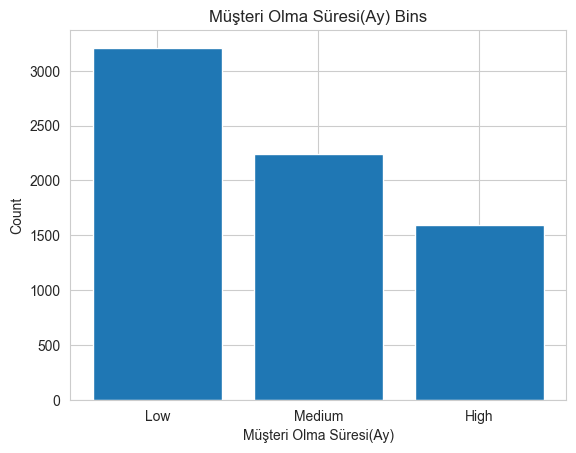

In [75]:
binning_feature('Müşteri Olma Süresi(Ay)')

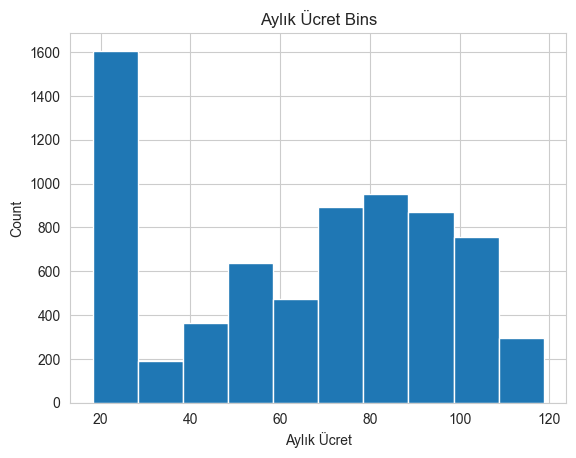

**Value Range**

Low ( 18.25 -  51.75)

Medium ( 51.75 -  85.25)

High ( 85.25 -  118.75)

,Aylık Ücret,Aylık Ücret-binned
0,29.85,Low
1,56.95,Medium
2,53.85,Medium
3,42.30,Low
4,70.70,Medium
5,99.65,High
6,89.10,High
7,29.75,Low
8,104.80,High
9,56.15,Medium


<br>**Binning Distribution**<br>

Low       2451
Medium    2439
High      2153
Name: Aylık Ücret-binned, dtype: int64

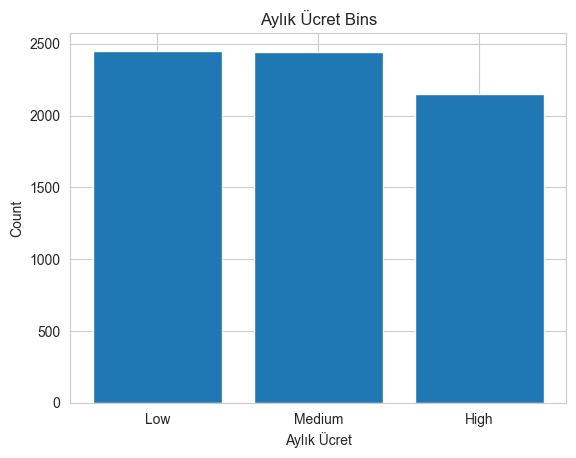

In [76]:
binning_feature('Aylık Ücret')

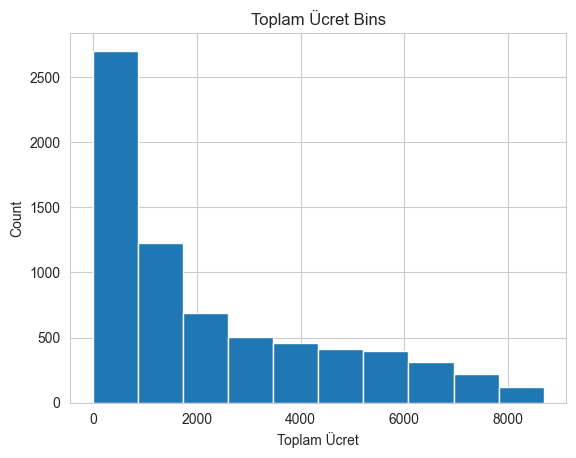

**Value Range**

Low ( 0.00 -  2894.93)

Medium ( 2894.93 -  5789.87)

High ( 5789.87 -  8684.80)

,Toplam Ücret,Toplam Ücret-binned
0,29.85,Low
1,1889.50,Low
2,108.15,Low
3,1840.75,Low
4,151.65,Low
5,820.50,Low
6,1949.40,Low
7,301.90,Low
8,3046.05,Medium
9,3487.95,Medium


<br>**Binning Distribution**<br>

Low       4782
Medium    1474
High       787
Name: Toplam Ücret-binned, dtype: int64

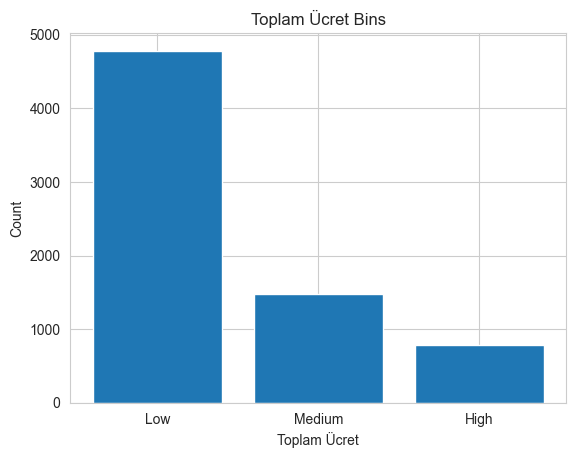

In [77]:
binning_feature('Toplam Ücret')

In [78]:
df["Toplam Ücret"] = pd.to_numeric(df["Toplam Ücret"], errors = 'coerce')

In [79]:
printmd("**Data Types**<br>")
df.dtypes.value_counts()

**Data Types**<br>

object      16
category     3
int64        2
float64      2
dtype: int64

In [80]:
df.to_csv("D:\SERKAN KIZILIRMAK\Python\AllProjects\Müşteri Kayıp Analizi (TelcoCustomer)\Data\TelcoCustomer(TR)_binned.csv", index=False)